In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation, Flatten
from tensorflow.keras.models import Sequential
from math import sqrt
import math

In [2]:
X_train = np.load('X_train_isone.npy')
X_val   = np.load('X_val_isone.npy')
X_test = np.load('X_test_isone.npy')
Y_train = np.load('Y_train_isone.npy')
Y_val  = np.load('Y_val_isone.npy')
Y_test = np.load('Y_test_isone.npy')


In [3]:
#create evaluation function to use them in lstms training
#create MAPE and MAE functions
def mean_absolute_percentage_error(y_true, y_pred): 
    mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape
def mean_absolute_error(y_true, y_pred): 
    MAE = np.mean(np.abs(y_true-y_pred))
    return MAE
#create a function to evaluate LSTM with MAPE, MAE, RMSE, RRMSE and r2_score
def evaluation_function(y_true, y_pred):

    MAPE=mean_absolute_percentage_error(y_true, y_pred)
    print(f'MAPE: {"{:.5f}".format(MAPE)} %')
    MAE = mean_absolute_error(y_true, y_pred)
    print(f'MAE : {"{:.5f}".format(MAE)}')

    #RMSE and RRMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'RMSE: {"{:.5f}".format(rmse)}')

    RRMSE = (rmse/np.mean(y_true))*100
    print(f'RRMSE: {"{:.5f}".format(RRMSE)} % ')      
    r2 = r2_score(y_true, y_pred)
    print(f'Test R^2 score: {"{:.5f}".format(r2)}')
    
    return MAPE, MAE, rmse, RRMSE, r2
          
def yearly_error(y_true, y_pred):
    mape = []
    for i in range(0, len(y_pred)):
        for j in range(0, len(y_pred[0])):
            mape.append(mean_absolute_percentage_error(y_true[i][j],y_pred[i][j]))
    #count how many hours has error <=10%, >10% and <15%, >15% and find the percentage of every month
    count1 = 0
    count2 = 0
    count3 = 0
    for item in mape:
        if item <= 10:
            count1 += 1
        elif item <= 15:
            count2 += 1
        else :
            count3 += 1
    print('for the year')
    percentage1 =(count1*100) /(len(y_pred)*len(y_pred[0]))
    print(f'{"{:.3f}".format(percentage1)}% has error <=10')
    percentage2 =(count2*100) /(len(y_pred)*len(y_pred[0]))
    print(f'{"{:.3f}".format(percentage2)}% has error <=15')
    percentage3 =(count3*100) /(len(y_pred)*len(y_pred[0]))
    print(f'{"{:.3f}".format(percentage3)}% has error >15')
          
    return percentage1,percentage2,percentage3

### Load old model  make evaluation for each cluster

In [4]:
np.random.seed(7)
tf.random.set_seed(7)

In [5]:
hyp_1model = keras.models.load_model('hyp_best_model_iso_ne.h5')

In [6]:
# make a prediction and evaluation
initial_model_pred = hyp_1model.predict(X_test)
evaluation_function(Y_test, initial_model_pred)
print("\n")
yearly_error(Y_test , initial_model_pred)
print("\n")


MAPE: 2.31569 %
MAE : 0.01233
RMSE: 0.01691
RRMSE: 3.26664 % 
Test R^2 score: 0.93360


for the year
99.521% has error <=10
0.468% has error <=15
0.011% has error >15




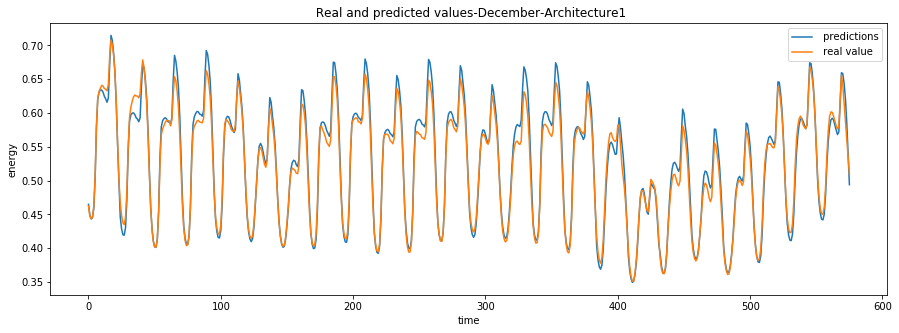

In [7]:
#plot predictions and actual values of load
#select the month 1>Jan, 2>feb, 3>Mar
Month =12
Ytest= np.array(Y_test)
predictions = initial_model_pred.flatten()
actual = Ytest.flatten()

fig = plt.figure(figsize=(15,5))
plt.plot(  predictions[31*24*(Month-1):31*24*Month] ,label = " predictions" )
plt.plot(  actual[31*24*(Month-1):31*24*Month], label = " real value ")
plt.xlabel('time')
plt.ylabel('energy')
plt.title(' Real and predicted values-December-Architecture1')
plt.legend()
plt.show()

###  Evaluate the  3 different models for each cluster

In [8]:
#save predictions in a list
total_predictions_se= []
total_metrics = []

#### model 1

In [9]:
#load data
X_train1 = np.load('ISO_NE/X_train1_isone.npy')
X_val1   = np.load('ISO_NE/X_val1_isone.npy')
X_test1 = np.load('ISO_NE/X_test1_isone.npy')
Y_train1 = np.load('ISO_NE/Y_train1_isone.npy')
Y_val1  = np.load('ISO_NE/Y_val1_isone.npy')
Y_test1 = np.load('ISO_NE/Y_test1_isone.npy')

In [10]:
#intergrate
model_1 = keras.models.load_model('hyp_cluster1_isone.h5')

In [11]:
# make a prediction and evaluation
Y_pred_1 = model_1.predict(X_test1)

MAPE, MAE, rmse, RRMSE, r2 =  evaluation_function(y_true= Y_test1, y_pred= Y_pred_1)
print("\n")
per1,per2,per3 = yearly_error(y_true =Y_test1 , y_pred = Y_pred_1)
print("\n")
total_metrics.append([MAPE, MAE, rmse, RRMSE, r2, per1,per2,per3])

MAPE: 2.99911 %
MAE : 0.01732
RMSE: 0.02258
RRMSE: 3.90017 % 
Test R^2 score: 0.90568


for the year
97.908% has error <=10
1.793% has error <=15
0.299% has error >15




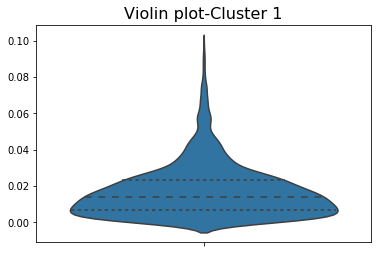

In [12]:
def violin_plot_error(error):
    ax = sns.violinplot(y=abs(error), inner='quartile')
    ax.set_title('Violin plot-Cluster 1', fontsize=16);
#violin plot for absolute error
violin_plot_error(Y_test1- Y_pred_1)

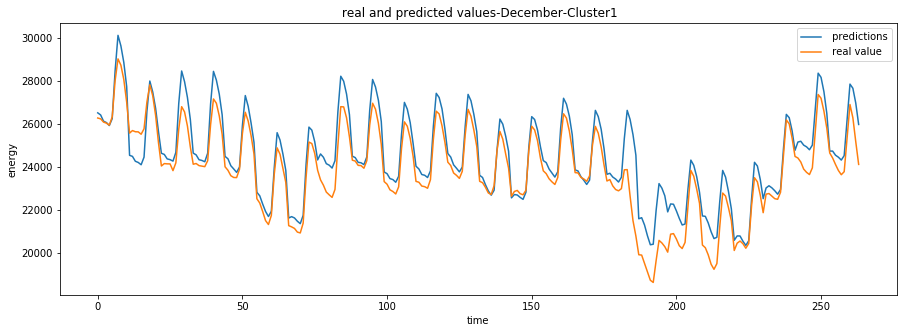

In [13]:
#plot predictions and actual values of load , for January
#select the month 1>Jan, 2>feb, 3>Mar
Month = 12
hours = len(Y_test1[0])
Ytest= np.array(Y_test1)
predictions = Y_pred_1.flatten()
actual = Ytest.flatten()
ac = actual*41015
pr = predictions*41015
fig = plt.figure(figsize=(15,5))
plt.plot(  pr[31*hours*(Month-1):31*hours*Month] ,label = " predictions" )
plt.plot(  ac[31*hours*(Month-1):31*hours*Month] , label = " real value ")
plt.xlabel('time')
plt.ylabel('energy')
plt.title(' real and predicted values-December-Cluster1')
plt.legend()
plt.show()

In [14]:
total_predictions_se.append(Y_pred_1)

#### model 2

In [15]:
#load data
X_train2 = np.load('ISO_NE/X_train2_isone.npy')
X_val2   = np.load('ISO_NE/X_val2_isone.npy')
X_test2 = np.load('ISO_NE/X_test2_isone.npy')
Y_train2 = np.load('ISO_NE/Y_train2_isone.npy')
Y_val2  = np.load('ISO_NE/Y_val2_isone.npy')
Y_test2 = np.load('ISO_NE/Y_test2_isone.npy')

In [16]:
#intergrated clustering
model_2 = keras.models.load_model('hyp_cluster2_isone.h5')

In [17]:
# make a prediction and evaluation
Y_pred_2 = model_2.predict(X_test2)

MAPE, MAE, rmse, RRMSE, r2 = evaluation_function(y_true= Y_test2, y_pred= Y_pred_2)
print("\n")
per1,per2,per3 = yearly_error(y_true =Y_test2 , y_pred = Y_pred_2)
print("\n")
total_metrics.append([MAPE, MAE, rmse, RRMSE, r2, per1,per2,per3])


MAPE: 1.69979 %
MAE : 0.00734
RMSE: 0.01192
RRMSE: 2.81224 % 
Test R^2 score: 0.94827


for the year
99.692% has error <=10
0.205% has error <=15
0.103% has error >15




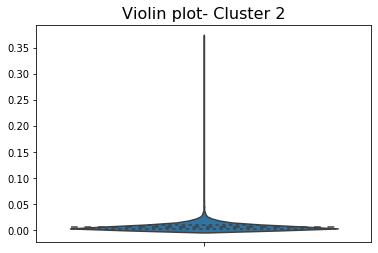

In [18]:
def violin_plot_error(error):
    ax = sns.violinplot(y=abs(error), inner='quartile')
    ax.set_title('Violin plot- Cluster 2', fontsize=16);
#violin plot for absolute error
violin_plot_error(Y_test2- Y_pred_2)

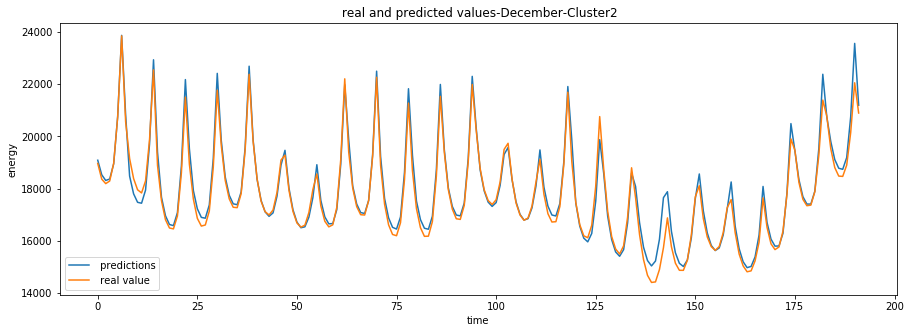

In [19]:
#plot predictions and actual values of load
#select the month 1>Jan, 2>feb, 3>Mar
Month = 12
hours = len(Y_test2[0])
Ytest_2= np.array(Y_test2)
predictions = Y_pred_2.flatten()
actual = Ytest_2.flatten()
ac = actual*41015
pr = predictions*41015
fig = plt.figure(figsize=(15,5))
plt.plot(  pr[31*hours*(Month-1):31*hours*Month],label = " predictions" )
plt.plot(  ac[31*hours*(Month-1):31*hours*Month], label = " real value ")
plt.xlabel('time')
plt.ylabel('energy')
plt.title(' real and predicted values-December-Cluster2')
plt.legend()
plt.show()

In [20]:
total_predictions_se.append(Y_pred_2)

#### LSTM for cluster3

In [21]:
#load data
X_train3 = np.load('ISO_NE/X_train3_isone.npy')
X_val3   = np.load('ISO_NE/X_val3_isone.npy')
X_test3 = np.load('ISO_NE/X_test3_isone.npy')
Y_train3 = np.load('ISO_NE/Y_train3_isone.npy')
Y_val3  = np.load('ISO_NE/Y_val3_isone.npy')
Y_test3 = np.load('ISO_NE/Y_test3_isone.npy')

In [22]:
#intergrated clustering
model_3 = keras.models.load_model('hyp_cluster3_isone.h5')

In [23]:
# make a prediction and evaluation
Y_pred_3 = model_3.predict(X_test3)

MAPE, MAE, rmse, RRMSE, r2 =  evaluation_function(y_true= Y_test3, y_pred= Y_pred_3)
print("\n")
per1,per2,per3 = yearly_error(y_true =Y_test3 , y_pred = Y_pred_3)
print("\n")
total_metrics.append([MAPE, MAE, rmse, RRMSE, r2, per1,per2,per3])


MAPE: 2.11560 %
MAE : 0.01130
RMSE: 0.01473
RRMSE: 2.76577 % 
Test R^2 score: 0.94373


for the year
99.452% has error <=10
0.548% has error <=15
0.000% has error >15




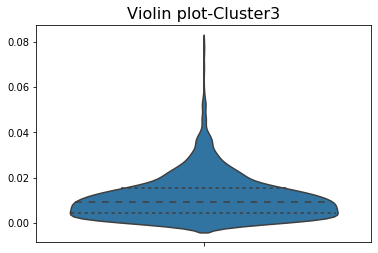

In [24]:
def violin_plot_error(error):
    ax = sns.violinplot(y=abs(error), inner='quartile')
    ax.set_title('Violin plot-Cluster3', fontsize=16);
#violin plot for absolute error
violin_plot_error(Y_test3- Y_pred_3)

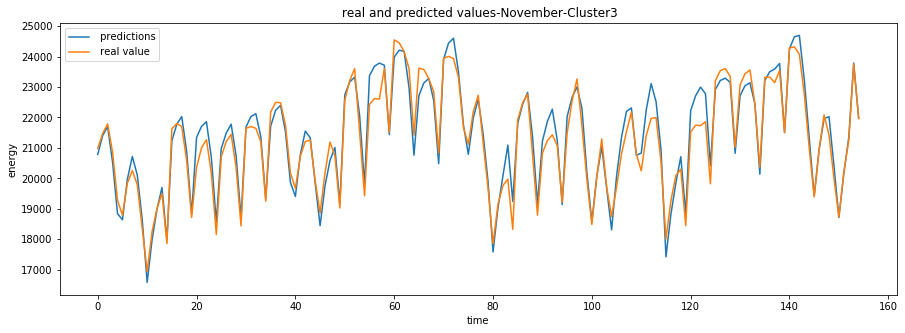

In [25]:
#plot predictions and actual values of load
#select the month 1>Jan, 2>feb, 3>Mar
Month = 11
hours = len(Y_test3[0])
Ytest_3= np.array(Y_test3)
predictions = Y_pred_3.flatten()
actual = Ytest_3.flatten()
ac = actual*41015
pr = predictions*41015
fig = plt.figure(figsize=(15,5))
plt.plot(  pr[31*hours*(Month-1):31*hours*Month],label = " predictions" )
plt.plot(  ac[31*hours*(Month-1):31*hours*Month], label = " real value ")
plt.xlabel('time')
plt.ylabel('energy')
plt.title(' real and predicted values-November-Cluster3')
plt.legend()
plt.show()

In [26]:
total_predictions_se.append(Y_pred_3)

#### find Cl-time lstm metrics

In [27]:
total_clusters = [[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [1, 2, 3, 4, 5, 6,7, 24], [ 8, 9,10, 22, 23]]

In [28]:
#calculate total metrics
def final_metrics (metrics , clusters):
    final_met = []
    for i in range(0,len(metrics[0])):
        temp = 0
        for j in range(0,len(clusters)):
            temp = temp +  metrics[j][i] * len(clusters[j])
        temp = temp /24
        final_met.append(temp)
    return final_met

In [29]:
metrics_final = final_metrics (total_metrics , total_clusters)
met = ["MAPE" , "MAE", "rmse", "RRMSE", "r2", "<=10","<=15",">15"]
for m in range(0,len(met)):
    print(met[m],metrics_final[m])

MAPE 2.3819377489616587
MAE 0.01273730874021861
rmse 0.01739282407154324
RRMSE 3.301192230122084
r2 0.9278080129002492
<=10 98.82420091324201
<=15 1.004566210045662
>15 0.17123287671232876
